# Pytorch fundamental

In [3]:
import torch
import numpy as np
torch.__version__

'1.10.0'

## Tensor object

In [4]:
scalar = torch.tensor(7)
print(scalar.ndim)
scalar.item()

0


7

In [8]:
vector = torch.tensor([7, 7])
print(vector.ndim)
vector.shape

1


torch.Size([2])

In [11]:
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
print(MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


In [12]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [15]:
print(TENSOR.ndim)
print(TENSOR.shape)

3
torch.Size([1, 3, 3])


In [16]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
ones = torch.ones(size=(3, 4))
# Use torch.arange(), torch.range() is deprecated 
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)

<ipython-input-16-25ef2e1c525d>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


## Manupulating tensor

In [17]:
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [18]:
tensor * 10

tensor([10, 20, 30])

In [20]:
# torch function
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [21]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [22]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [23]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)
# Transpose tensor_B
print(tensor_B.T)

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


## Finding the min, max, mean, sum, etc (aggregation)

In [24]:
x = torch.arange(0, 100, 10)

In [32]:
print(x.min())
print(x.max())
print(x.type(torch.float32).mean())
print(x)

tensor(0)
tensor(90)
tensor(45.)
tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


In [33]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [35]:
# numpy to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [36]:
# tensor to numpy
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed

## Test workflow

In [37]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

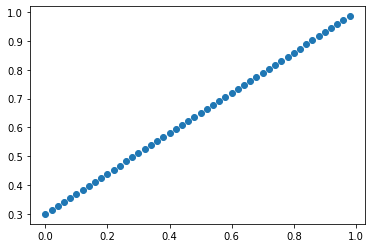

In [39]:
plt.scatter(X, y)

### Split data into training and test sets

In [40]:
n_split = int(0.8 * len(X))
X_train, y_train = X[:n_split], y[:n_split]
X_test, y_test = X[n_split:], y[n_split:]
len(X_train), len(X_test)

(40, 10)

### Create a class for linear regression model

In [41]:
## Create a model linear regression model
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [42]:
model = LinearRegression()

In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [44]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

### Making a prediction using torch.inference_mode()
check y predict if we use the initial parameter 

In [45]:
with torch.inference_mode(): 
    y_preds = model(X_test)

In [46]:
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

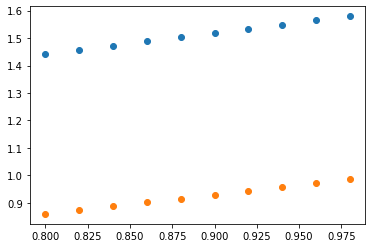

In [47]:
plt.scatter(X_test, y_preds)
plt.scatter(X_test, y_test)

### Train model
Create a loss function and optimizer

In [48]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params = model.parameters(), lr=0.01)

Create an training loop
1. put model to training mode
2. do the forward pass
3. calculate loss
4. zero grad of optimizer
5. loss backward
6. optimizer step

In [49]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss: {loss.item()}")

Epoch: 0 Loss: 0.5551779866218567
Epoch: 10 Loss: 0.4399680495262146
Epoch: 20 Loss: 0.3247582018375397
Epoch: 30 Loss: 0.20954827964305878
Epoch: 40 Loss: 0.09433844685554504
Epoch: 50 Loss: 0.023886386305093765
Epoch: 60 Loss: 0.0199567973613739
Epoch: 70 Loss: 0.016517987474799156
Epoch: 80 Loss: 0.013089170679450035
Epoch: 90 Loss: 0.009653178043663502
Epoch: 100 Loss: 0.006215679459273815
Epoch: 110 Loss: 0.002787243574857712
Epoch: 120 Loss: 0.0012645035749301314
Epoch: 130 Loss: 0.0012645035749301314
Epoch: 140 Loss: 0.0012645035749301314
Epoch: 150 Loss: 0.0012645035749301314
Epoch: 160 Loss: 0.0012645035749301314
Epoch: 170 Loss: 0.0012645035749301314
Epoch: 180 Loss: 0.0012645035749301314
Epoch: 190 Loss: 0.0012645035749301314


### Prediction

In [51]:
# 1. model evaluation mode
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
    loss = loss_fn(y_preds, y_test)
    print(f"Loss: {loss.item()}")

Loss: 0.0003308236482553184


In [52]:
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

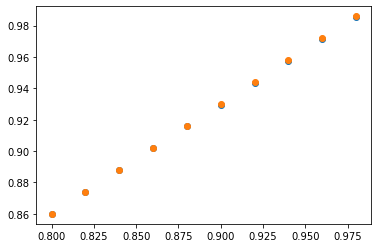

In [54]:
plt.scatter(X_test, y_preds)
plt.scatter(X_test, y_test)

In [55]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]])),
             ('linear.bias', tensor([0.3025]))])

### Save a model
save only model.state_dict() for trained parameters